# 项目案例二：面部图像聚类

## 第一步：数据准备和预处理
下载LFW数据集，并对数据进行标准化处理。
使用 scikit-learn 的 fetch_lfw_people 函数下载LFW数据集，确保每个人物至少有70张面部图像。
提取数据集中的图像数据，并打印图像的尺寸（如图像的数量、图像的高度和宽度）。
使用 StandardScaler 对图像数据进行标准化处理，使其均值为0，标准差为1。
输出标准化后的数据形状。

In [58]:
# 导入必要的库
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler

# 下载LFW人脸数据集
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=1.0)
# lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
num = 512
X = lfw_people.data  # 提取图像数据
n_samples, h, w = lfw_people.images.shape  # 获取图像的尺寸

# 输出数据形状
print("Number of samples:", n_samples)
print("Image height:", h)
print("Image width:", w)

# 数据标准化处理
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# 输出标准化后的数据形状
print("Normalized data shape:", X_normalized.shape)

Number of samples: 1288
Image height: 125
Image width: 94
Normalized data shape: (1288, 11750)


## 第二步：特征提取和降维
使用PCA对面部图像特征进行降维，以减少计算复杂度。
初始化PCA，将数据降维到150维。
使用PCA对标准化后的图像数据进行降维。
输出降维后的数据形状。

In [59]:
# 导入PCA库
from sklearn.decomposition import PCA

# 特征降维
pca = PCA(n_components=150, whiten=True)
train_data = pca.fit_transform(X_normalized)

# 输出降维后的数据形状
print("Dimensionality reduction data shape:", train_data.shape)

Dimensionality reduction data shape: (1288, 150)


## 第三步：高斯混合模型初始化和训练
使用高斯混合模型对降维后的面部图像特征进行聚类。
初始化高斯混合模型（GMM），设置组件数量为7（假设将面部图像分成7类）。
使用降维后的数据训练GMM模型。
输出训练好的GMM模型的参数，包括每个高斯分布的均值、协方差矩阵和混合系数。

In [60]:
# 导入GMM库
from sklearn.mixture import GaussianMixture

# 高斯混合模型初始化和训练
GMM_model = GaussianMixture(n_components=7, max_iter=10000)
GMM_model.fit(train_data) # 训练模型
# 增加迭代次数 

# 输出高斯分布的均值、协方差矩阵和混合系数
# print("GMM Model mean:\n{}".format(GMM_model.means_))
# print("GMM Model covariance:\n{}".format(GMM_model.covariances_))
# print("GMM Model weight:\n{}".format(GMM_model.weights_))

print("Means shape:", GMM_model.means_.shape)
print("Covariances shape:", GMM_model.covariances_.shape)
print("Weights:", GMM_model.weights_)

Means shape: (7, 150)
Covariances shape: (7, 150, 150)
Weights: [0.0007764  0.61062284 0.32648897 0.0007764  0.0007764  0.05822981
 0.00232919]


## 第四步：结果可视化
通过可视化展示聚类结果，包括每个聚类的中心面部图像。
定义一个函数，用于绘制面部图像的网格。
获取每个聚类的中心（均值），并将PCA空间中的均值逆变换回原始图像空间。
使用定义的函数绘制聚类中心的面部图像。

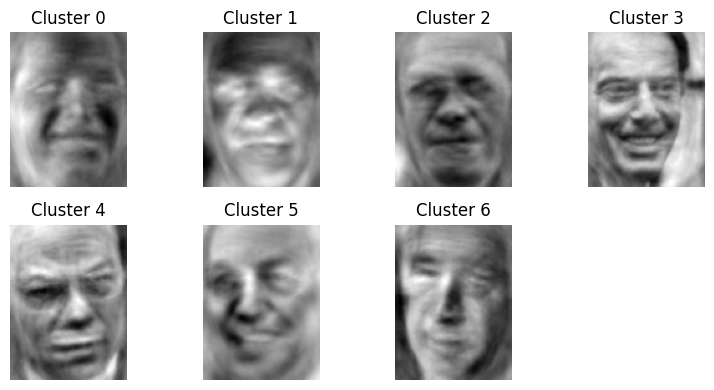

In [61]:
# 绘制面部图像的网格
import matplotlib.pyplot as plt

def show_reconstructed_images(model_means):
    # 逆变换GMM的均值回到原始特征空间
    original_dim_centers = pca.inverse_transform(model_means)

    # 逆标准化
    original_dim_centers_unscaled = original_dim_centers
    # original_dim_centers_unscaled = scaler.inverse_transform(original_dim_centers)

    # 重构图像
    images_reconstructed = original_dim_centers_unscaled.reshape(-1, h, w)

    # 可视化聚类中心代表的人脸图像
    fig, axes = plt.subplots(2, 4, figsize=(8, 4))  # 7个聚类，展示一个2x4的网格，最后一个位置留空
    for i, (image, ax) in enumerate(zip(images_reconstructed, axes.flatten())):
        if i < 7:  # 确保索引不会超出范围
            ax.imshow(image, cmap='gray')  # 使用灰度图显示
            ax.axis('off')  # 不显示坐标轴
            ax.set_title(f'Cluster {i}')

    fig.delaxes(axes[1][3])  # 手动删除第(2,4)位置的子图
    plt.tight_layout()
    plt.show()

# 结果可视化
show_reconstructed_images(GMM_model.means_)

## 总结
通过这个实验，我们学习了如何使用高斯混合模型对面部图像数据进行聚类。通过数据预处理、特征提取、降维和聚类分析，我们能够将具有相似特征的面部图像分成不同的组。这个方法在面部识别、图像分类和计算机视觉等领域有着广泛的应用。